In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/MauryaEtech/Desktop/Simplilearn/Machine learning recordings/Amazon - Movies and TV Ratings.csv')

In [3]:
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(4848, 207)

In [5]:
df.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


In [6]:
# Q1.which movies have maximum views or ratings?

In [7]:
df_main = df.copy() #if we do any changes still we can get the main data set.

In [8]:
df.describe().T["count"].sort_values(ascending = False)[:5].to_frame()

,count
Movie127,2313.0
Movie140,578.0
Movie16,320.0
Movie103,272.0
Movie29,243.0


In [9]:
df.describe().T["count"].sort_values(ascending = False)[:1].to_frame()

,count
Movie127,2313.0


In [10]:
#INSIGHTS:- Here Movie 127 is having maximum views and ratings.

In [11]:
# Q2. What is the avg ratings of each movie? define the top 5 movies with the maximum ratings.

In [12]:
df.drop('user_id', axis = 1).sum().sort_values(ascending = False)[:5].to_frame()

,0
Movie127,9511.0
Movie140,2794.0
Movie16,1446.0
Movie103,1241.0
Movie29,1168.0


In [13]:
df.drop('user_id', axis = 1).mean().sort_values(ascending = False)[:5].to_frame()

,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


<AxesSubplot:ylabel='Frequency'>

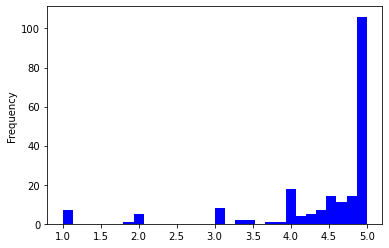

In [14]:
# to plot mean frequency
df.describe().T['mean'].plot(bins=30,kind='hist',color='blue')

<AxesSubplot:ylabel='Frequency'>

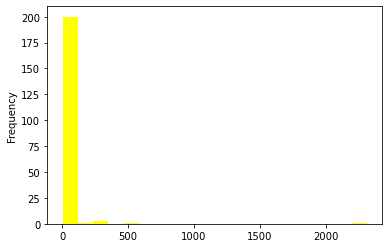

In [15]:
# to plot the count frequency
df.describe().T['count'].plot(bins=20,kind='hist',color='yellow')

In [16]:
# Q3.Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. 
     #Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm 
     #which provides the ratings for each of the users.

#Divide the data into training and test data
#Build a recommendation model on training data
#Make predictions on the test data

In [17]:
!pip install scikit-surprise

In [18]:
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [19]:
df.columns

Index(['user_id', 'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6',
       'Movie7', 'Movie8', 'Movie9',
       ...
       'Movie197', 'Movie198', 'Movie199', 'Movie200', 'Movie201', 'Movie202',
       'Movie203', 'Movie204', 'Movie205', 'Movie206'],
      dtype='object', length=207)

In [20]:
melt_df = df.melt(id_vars = df.columns[0], value_vars = df.columns[1:], var_name = "movie_name", value_name = "rating")
melt_df

,user_id,movie_name,rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [21]:
from surprise import Dataset

In [22]:
reader = Reader(rating_scale=(-1,10))

data = Dataset.load_from_df(melt_df.fillna(0), reader = reader)

In [23]:
trainset , testset = train_test_split(data, test_size=0.25)

In [24]:
from surprise import SVD

In [25]:
algo = SVD()

In [26]:
algo.fit(trainset)

In [27]:
predictions = algo.test(testset)

In [28]:
accuracy.rmse(predictions)

RMSE: 0.2826


0.2825873062645567

In [29]:
accuracy.mae(predictions)

MAE:  0.0415


0.04154415657487693

In [30]:
user_id = 'A3R5OBKS7OM2IR'
muvi_id = 'Movie1'
r_ui = 5.0
algo.predict(user_id,muvi_id,r_ui=r_ui, verbose=True)

user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.06   {'was_impossible': False}


Prediction(uid='A3R5OBKS7OM2IR', iid='Movie1', r_ui=5.0, est=0.05973222441022763, details={'was_impossible': False})

In [31]:
from surprise.model_selection import cross_validate

In [32]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2829  0.2774  0.2849  0.2817  0.0032  
MAE (testset)     0.0424  0.0422  0.0428  0.0425  0.0003  
Fit time          62.20   59.44   58.44   60.03   1.59    
Test time         4.37    6.75    4.57    5.23    1.08    


{'test_rmse': array([0.28291856, 0.27739012, 0.2848928 ]),
 'test_mae': array([0.04235345, 0.04220317, 0.04281024]),
 'fit_time': (62.202399015426636, 59.43599581718445, 58.43838024139404),
 'test_time': (4.370900392532349, 6.752608299255371, 4.569170713424683)}

In [33]:
def repeat(algo_type, frame, min_, max_):
    
    reader = Reader(rating_scale=(min_,max_))

    data = Dataset.load_from_df(frame, reader = reader)
    
    algo = algo_type
    
    print(cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True))
    
    print("#"*10)
    
    user_id = 'A3R5OBKS7OM2IR'
    muvi_id = 'Movie1'
    r_ui = 5.0
    print(algo.predict(user_id,muvi_id,r_ui=r_ui, verbose=True))
    
    print("#"*10)
    print

In [34]:
df = df.iloc[:1212, :50]
melt_df = df.melt(id_vars = df.columns[0], value_vars = df.columns[1:], var_name = "movie_name", value_name = "rating")

In [35]:
repeat(SVD(), melt_df.fillna(0), -1, 10)
repeat(SVD(), melt_df.fillna(melt_df.mean()), -1, 10)
repeat(SVD(), melt_df.fillna(melt_df.median()), -1, 10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.4705  0.4382  0.4485  0.4524  0.0135  
MAE (testset)     0.1085  0.0993  0.1027  0.1035  0.0038  
Fit time          3.08    3.10    2.93    3.04    0.07    
Test time         0.17    0.18    0.17    0.17    0.00    
{'test_rmse': array([0.47049378, 0.43817773, 0.44849795]), 'test_mae': array([0.10849934, 0.09932927, 0.10266269]), 'fit_time': (3.079941987991333, 3.0975353717803955, 2.930415391921997), 'test_time': (0.16914057731628418, 0.17981815338134766, 0.16988110542297363)}
##########
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.35   {'was_impossible': False}
user: A3R5OBKS7OM2IR item: Movie1     r_ui = 5.00   est = 0.35   {'was_impossible': False}
##########
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0860  0.0879  0.0967  0.0902  0.0046  
MAE (test

In [36]:
# grid search and find optimum hyperparameter value for n_factors.
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs':[20,30],
 'lr_all':[0.005,0.001],
 'n_factors':[50,100]}
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
data1 = Dataset.load_from_df(melt_df.fillna(melt_df['rating'].mean()),reader=reader)
gs.fit(data1)

In [37]:
gs.best_score
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.08948372655670513
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
